In [22]:
import pandas as pd

# Load the CSV file
file_path = '/mnt/data/Retinopathy Dataset'
data = pd.read_csv('retinopathy')

# Display the first few rows of the dataset
data.head()


,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
0,77.196340,85.288742,80.021878,79.957109,1.0
1,63.529850,99.379736,84.852361,110.382411,1.0
2,69.003986,111.349455,109.850616,100.828246,1.0
3,82.638210,95.056128,79.666851,87.066303,1.0
4,78.346286,109.154591,90.713220,92.511770,1.0


In [23]:
# Summary statistics of the dataset
data.describe()


,age,systolic_blood_pressure,diastolic_blood_pressure,cholesterol,has_retinopathy
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255,0.514500
std,8.564392,10.669267,9.648200,10.433915,0.499831
min,35.164761,69.675429,62.807105,69.967453,0.000000
25%,54.371941,93.267420,83.641788,93.202373,0.000000
50%,59.831159,100.119926,89.912429,100.060637,1.000000
75%,65.809652,107.439501,96.682405,107.250829,1.000000
max,103.279497,151.699660,133.456382,148.233544,1.000000


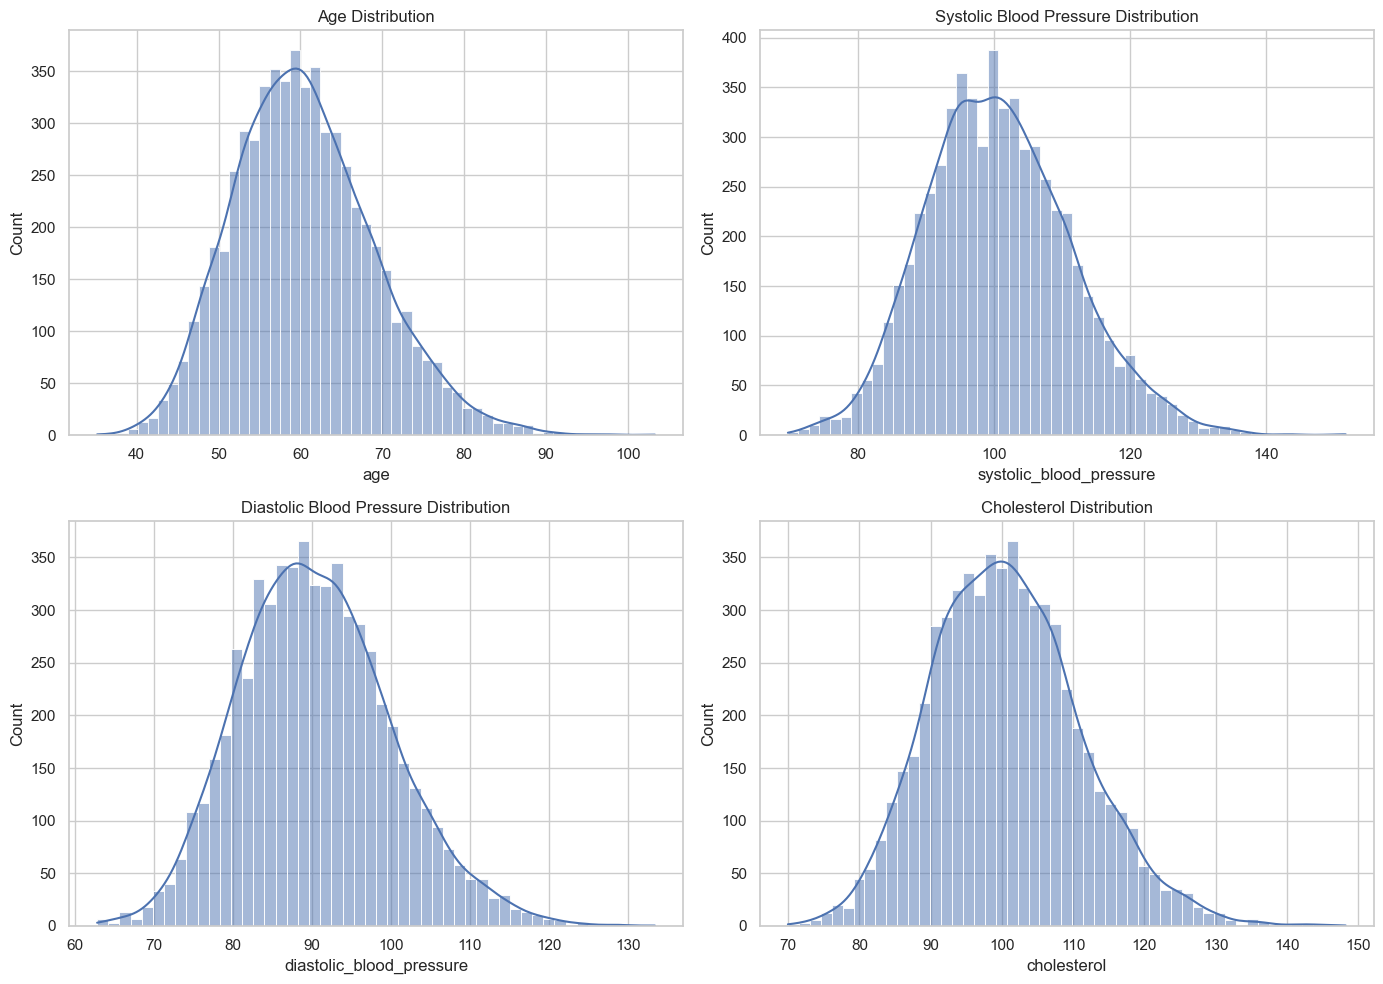

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for feature distributions
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

sns.histplot(data['systolic_blood_pressure'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Systolic Blood Pressure Distribution')

sns.histplot(data['diastolic_blood_pressure'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Diastolic Blood Pressure Distribution')

sns.histplot(data['cholesterol'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Cholesterol Distribution')

plt.tight_layout()
plt.show()



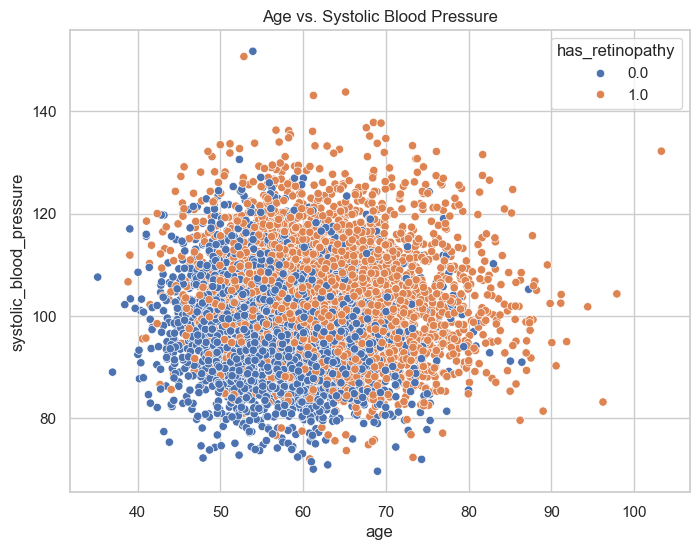

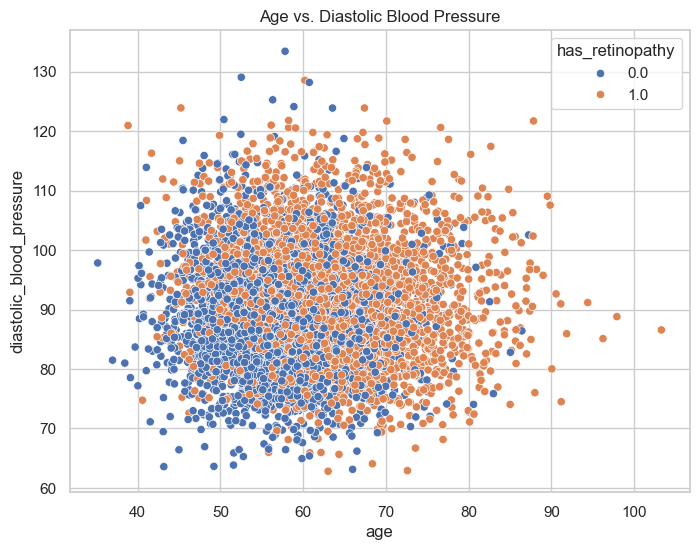

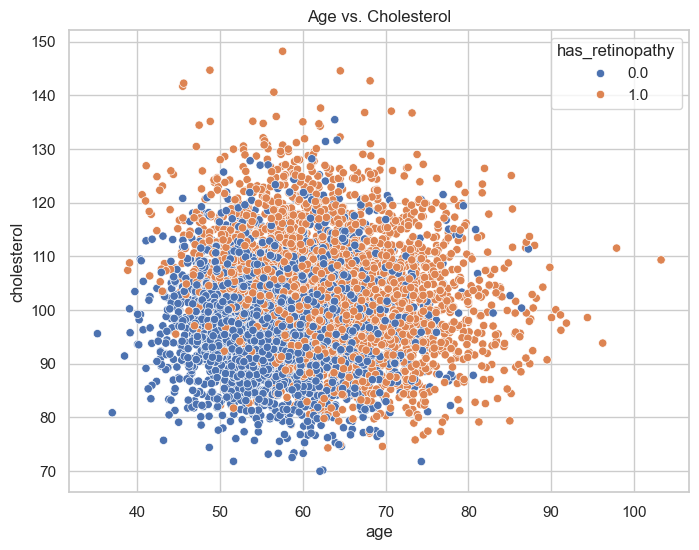

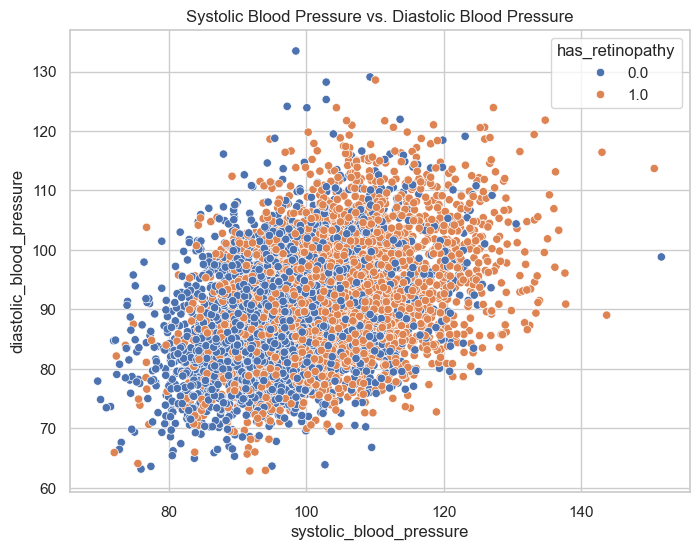

In [25]:
# Scatter plots to observe relationships

# Age vs. Systolic Blood Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='systolic_blood_pressure', hue='has_retinopathy')
plt.title('Age vs. Systolic Blood Pressure')
plt.show()

# Age vs. Diastolic Blood Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='diastolic_blood_pressure', hue='has_retinopathy')
plt.title('Age vs. Diastolic Blood Pressure')
plt.show()

# Age vs. Cholesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='age', y='cholesterol', hue='has_retinopathy')
plt.title('Age vs. Cholesterol')
plt.show()

# Systolic Blood Pressure vs. Diastolic Blood Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='systolic_blood_pressure', y='diastolic_blood_pressure', hue='has_retinopathy')
plt.title('Systolic Blood Pressure vs. Diastolic Blood Pressure')
plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the data
file_path = 'path_to_your_csv_file.csv'
data = pd.read_csv('Retinopathy')

# Define features and target
X = data[['age', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol']]
y = data['has_retinopathy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[428 147]
 [157 468]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74       575
         1.0       0.76      0.75      0.75       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the data
file_path = 'path_to_your_csv_file.csv'
data = pd.read_csv('retinopathy')

# Define features and target
X = data[['age', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol']]
y = data['has_retinopathy']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Function to predict retinopathy
def predict_retinopathy(age, systolic_bp, diastolic_bp, cholesterol):
    # Create a DataFrame for the new data point
    new_data = pd.DataFrame([[age, systolic_bp, diastolic_bp, cholesterol]], 
                            columns=['age', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol'])
    # Standardize the new data point
    new_data_scaled = scaler.transform(new_data)
    # Predict retinopathy (0 or 1)
    prediction = model.predict(new_data_scaled)
    # Predict probability of having retinopathy
    prediction_proba = model.predict_proba(new_data_scaled)[:, 1]
    
    return prediction[0], prediction_proba[0]

# Example usage
age = 55
systolic_bp = 120
diastolic_bp = 80
cholesterol = 95

has_retinopathy, probability = predict_retinopathy(age, systolic_bp, diastolic_bp, cholesterol)

print(f"Prediction: {'Has Retinopathy' if has_retinopathy else 'No Retinopathy'}")
print(f"Probability: {probability:.2f}")


Prediction: Has Retinopathy
Probability: 0.60


In [28]:
import pandas as pd

# Sample data
data = {
    'age': [77.19633950880227],
    'systolic_blood_pressure': [85.28874241861108],
    'diastolic_blood_pressure': [80.02187758411247],
    'cholesterol': [79.95710875331814],
    'has_retinopathy': [1.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Check for retinopathy
if df['has_retinopathy'][0] == 1.0:
    print("The person has retinopathy.")
else:
    print("The person does not have retinopathy.")


The person has retinopathy.


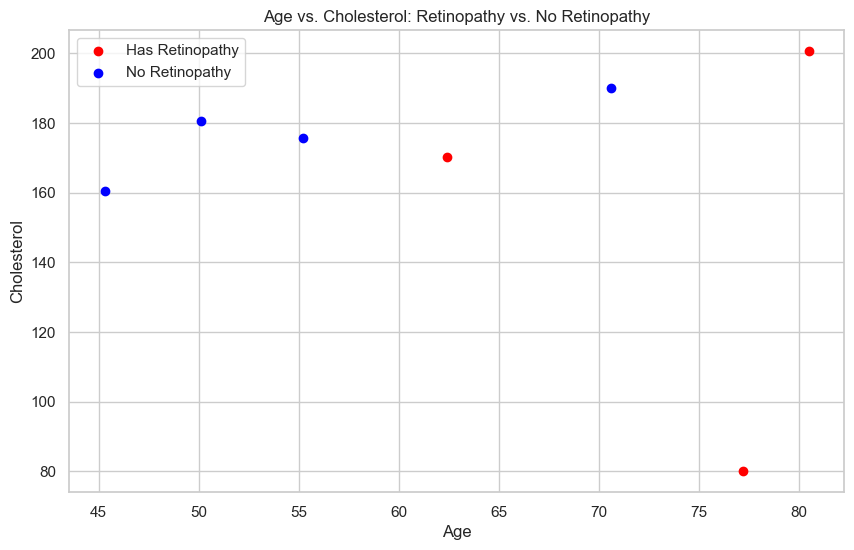

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'age': [77.2, 50.1, 62.4, 70.6, 45.3, 80.5, 55.2],
    'systolic_blood_pressure': [85.3, 120.5, 130.2, 140.1, 110.4, 150.6, 135.8],
    'diastolic_blood_pressure': [80.0, 85.2, 90.1, 88.4, 82.5, 95.3, 89.0],
    'cholesterol': [80.0, 180.5, 170.2, 190.1, 160.4, 200.6, 175.8],
    'has_retinopathy': [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Separate the data based on retinopathy
retinopathy = df[df['has_retinopathy'] == 1.0]
no_retinopathy = df[df['has_retinopathy'] == 0.0]

# Plot the data
plt.figure(figsize=(10, 6))

plt.scatter(retinopathy['age'], retinopathy['cholesterol'], color='red', label='Has Retinopathy')
plt.scatter(no_retinopathy['age'], no_retinopathy['cholesterol'], color='blue', label='No Retinopathy')

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol: Retinopathy vs. No Retinopathy')
plt.legend()
plt.grid(True)

plt.show()


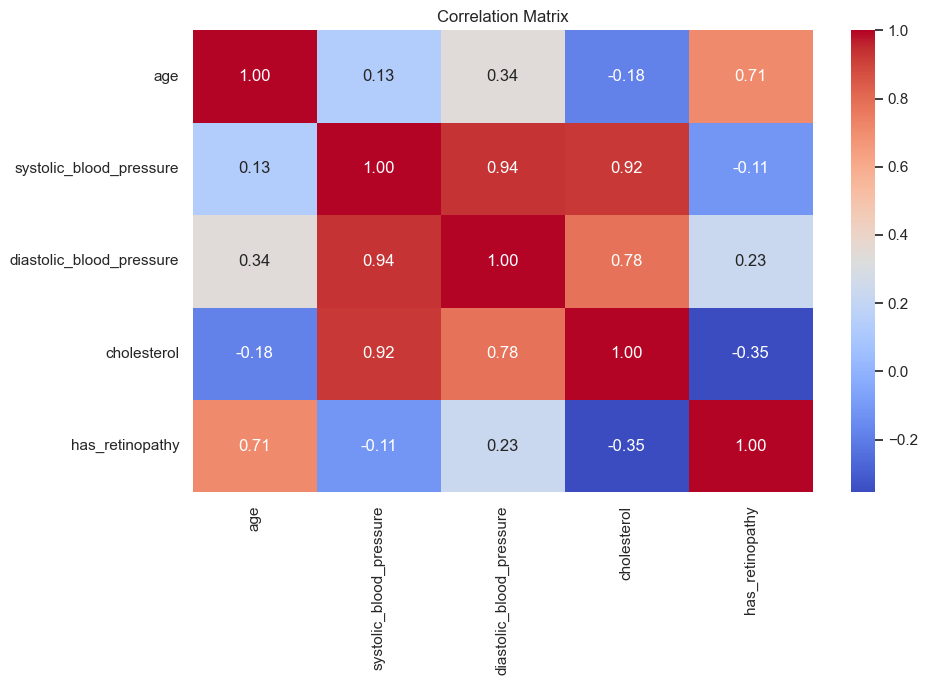

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


T-test for age: t-statistic = 2.26, p-value = 0.0732


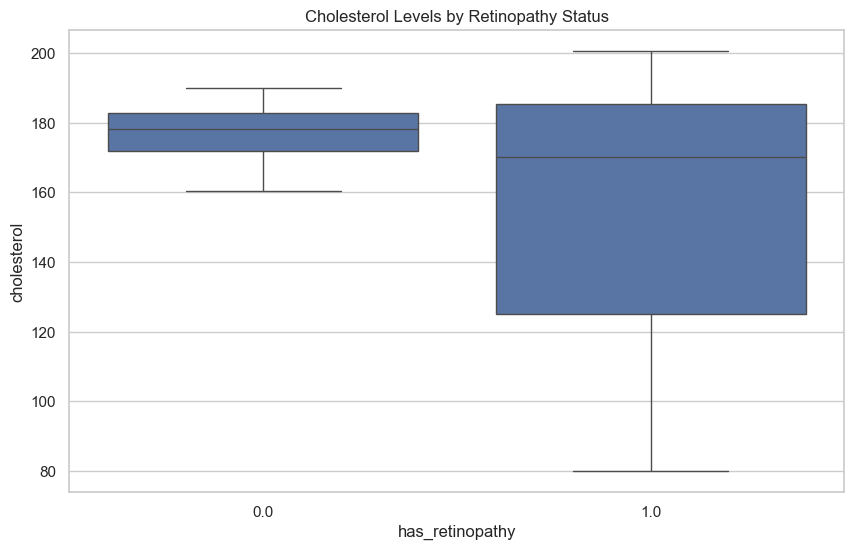

In [31]:
from scipy import stats

# T-test for age
retinopathy = df[df['has_retinopathy'] == 1.0]
no_retinopathy = df[df['has_retinopathy'] == 0.0]

t_stat, p_value = stats.ttest_ind(retinopathy['age'], no_retinopathy['age'])
print(f"T-test for age: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Box plot for cholesterol
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_retinopathy', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Retinopathy Status')
plt.show()


              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

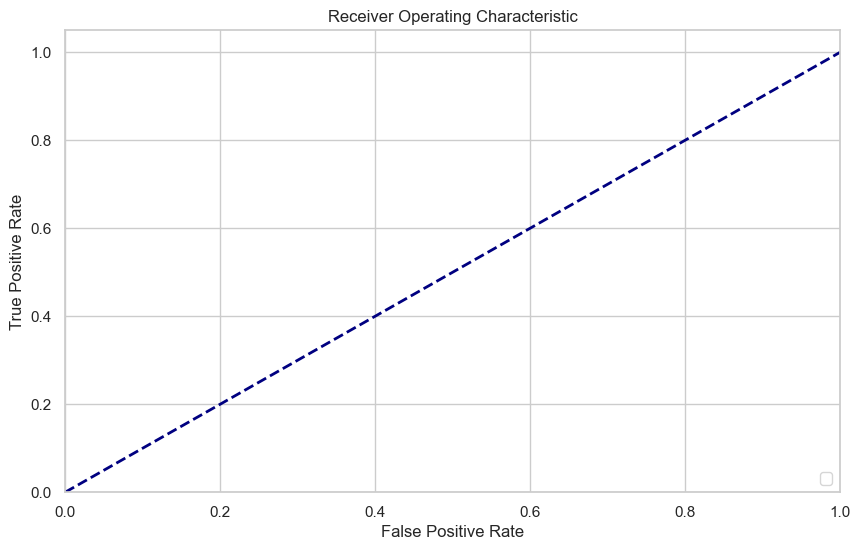

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Prepare data
X = df[['age', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'cholesterol']]
y = df['has_retinopathy']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


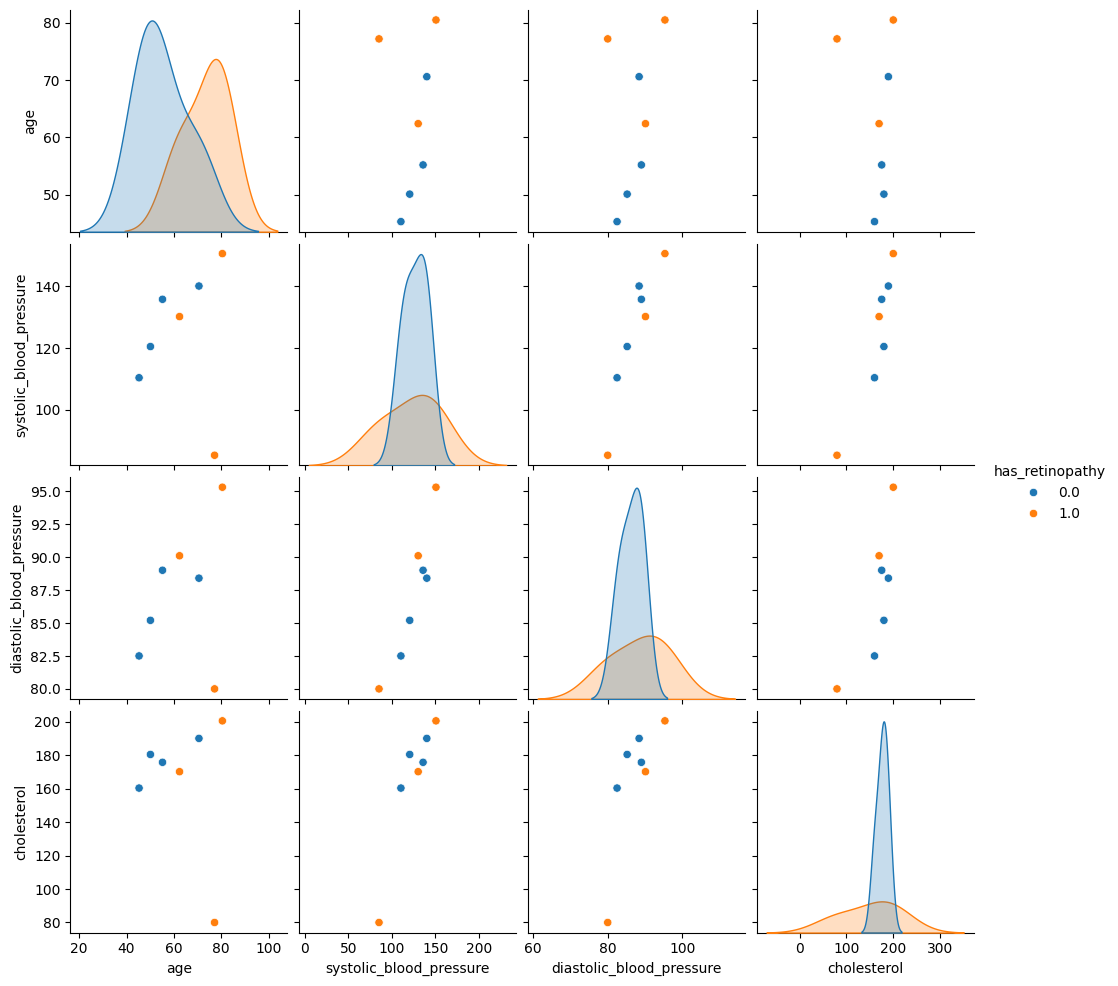

In [ ]:
# Pair plots
sns.pairplot(df, hue='has_retinopathy')
plt.show()


In [ ]:
# Missing values
print(df.isnull().sum())

# Outlier detection (e.g., using IQR for cholesterol)
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['cholesterol'] < (Q1 - 1.5 * IQR)) | (df['cholesterol'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in cholesterol: {len(outliers)}")


age                         0
systolic_blood_pressure     0
diastolic_blood_pressure    0
cholesterol                 0
has_retinopathy             0
cluster                     0
dtype: int64
Number of outliers in cholesterol: 1


In [ ]:
import pandas as pd

# Sample data
data = {
    'age': [77.2, 50.1, 62.4, 70.6, 45.3, 80.5, 55.2],
    'systolic_blood_pressure': [85.3, 120.5, 130.2, 140.1, 110.4, 150.6, 135.8],
    'diastolic_blood_pressure': [80.0, 85.2, 90.1, 88.4, 82.5, 95.3, 89.0],
    'cholesterol': [80.0, 180.5, 170.2, 190.1, 160.4, 200.6, 175.8],
    'has_retinopathy': [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
}

df = pd.DataFrame(data)

# Function to generate report for each person
def generate_report(row):
    retinopathy_status = 'Has Retinopathy' if row['has_retinopathy'] == 1.0 else 'No Retinopathy'
    report = (
        f"Report for Individual:\n"
        f"Age: {row['age']}\n"
        f"Systolic Blood Pressure: {row['systolic_blood_pressure']}\n"
        f"Diastolic Blood Pressure: {row['diastolic_blood_pressure']}\n"
        f"Cholesterol: {row['cholesterol']}\n"
        f"Retinopathy Status: {retinopathy_status}\n"
    )
    return report

# Generate and print report for each person
for index, row in df.iterrows():
    print(generate_report(row))
    print("-" * 30)


Report for Individual:
Age: 77.2
Systolic Blood Pressure: 85.3
Diastolic Blood Pressure: 80.0
Cholesterol: 80.0
Retinopathy Status: Has Retinopathy

------------------------------
Report for Individual:
Age: 50.1
Systolic Blood Pressure: 120.5
Diastolic Blood Pressure: 85.2
Cholesterol: 180.5
Retinopathy Status: No Retinopathy

------------------------------
Report for Individual:
Age: 62.4
Systolic Blood Pressure: 130.2
Diastolic Blood Pressure: 90.1
Cholesterol: 170.2
Retinopathy Status: Has Retinopathy

------------------------------
Report for Individual:
Age: 70.6
Systolic Blood Pressure: 140.1
Diastolic Blood Pressure: 88.4
Cholesterol: 190.1
Retinopathy Status: No Retinopathy

------------------------------
Report for Individual:
Age: 45.3
Systolic Blood Pressure: 110.4
Diastolic Blood Pressure: 82.5
Cholesterol: 160.4
Retinopathy Status: No Retinopathy

------------------------------
Report for Individual:
Age: 80.5
Systolic Blood Pressure: 150.6
Diastolic Blood Pressure: 95.3


In [ ]:
# Summary report
summary_report = df.describe(include='all').transpose()

# Save summary report to a CSV file
summary_report.to_csv('summary_report.csv')

print("Summary report saved to 'summary_report.csv'")


Summary report saved to 'summary_report.csv'


In [ ]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 6.9 MB/s eta 0:00:56
   ---------------------------------------- 0.5/385.0 MB 6.2 MB/s eta 0:01:03
   ---------------------------------------- 0.7/385.0 MB 5.8 MB/s eta 0:01:07
   ---------------------------------------- 1.0/385.0 MB 5.5 MB/s eta 0:01:11
   ---------------------------------------- 1.2/385.0 MB 5.7 MB/s eta 0:01:08
   ---------------------------------------- 1.4/385.0 MB 5.3 MB/s eta 0:01:13
   ----------

  You can safely remove it manually.
  You can safely remove it manually.


using randomforest

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('retinopathy')

# Assuming the last column is the label
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')
print(f'Validation F1 Score: {val_f1}')

# Evaluate the model on the test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

# Load the new data
new_data = pd.read_csv('new.csv')

# Ensure the new data has the same columns as the training data
new_data = new_data[X.columns]

# Make predictions on new data
predictions = model.predict(new_data)

# Convert predictions to class labels
predicted_classes = predictions
print(predicted_classes)


Validation Accuracy: 0.7066666666666667
Validation Precision: 0.7016129032258065
Validation Recall: 0.75
Validation F1 Score: 0.725
Test Accuracy: 0.7566666666666667
Test Precision: 0.7541666666666667
Test Recall: 0.7818574514038877
Test F1 Score: 0.767762460233298
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1.]


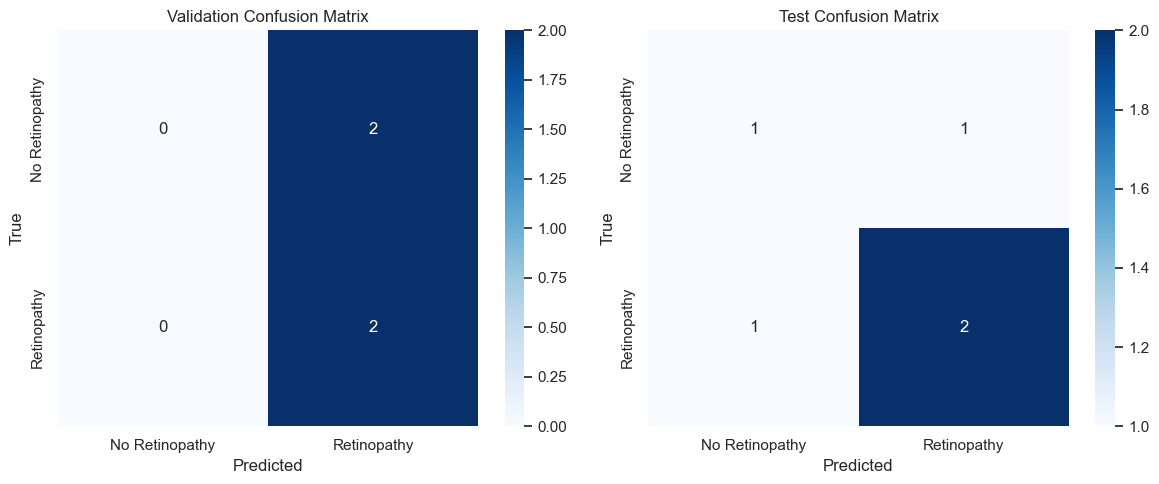

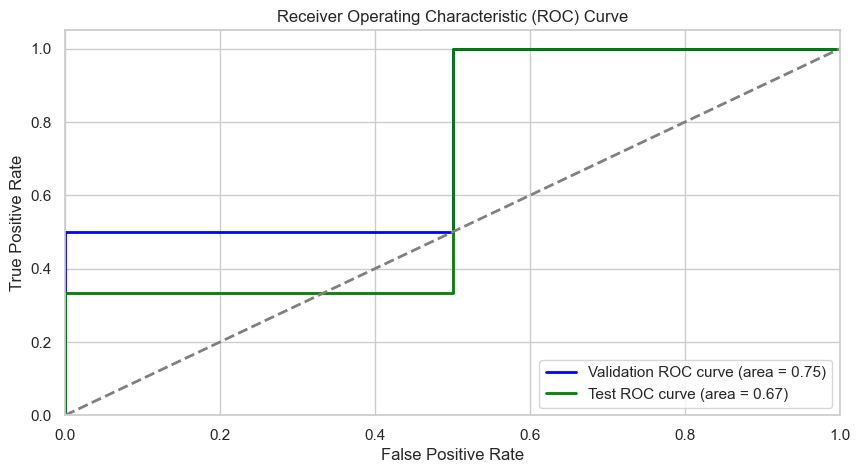

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('new.csv')

# Assuming the last column is the label
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate the model on the test data
y_test_pred = model.predict(X_test)

# Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['No Retinopathy', 'Retinopathy'], yticklabels=['No Retinopathy', 'Retinopathy'])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['No Retinopathy', 'Retinopathy'], yticklabels=['No Retinopathy', 'Retinopathy'])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# ROC Curve
fpr_val, tpr_val, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 5))

plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'Validation ROC curve (area = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [18]:
import pandas as pd

# Sample data
data = {
    'age': [86],
    'systolic_blood_pressure': [800.00],
    'diastolic_blood_pressure': [1200.00],
    'cholesterol': [120.108],
    'water_level': [0.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Check for retinopathy
if df['water_level'][0] == 1.0:
    print("The person has retinopathy.")
else:
    print("The person does not have retinopathy.")


The person does not have retinopathy.
